# Задание 1. Метрические методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для метода k ближайших соседей настроить параметр "Число ближайших соседей" (k).
5. Для метода окна Парзена настроить параметр "Ширина окна" (h).
6. Рекомендуется визуализировать результаты проведения экспериментов.
7. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Метрические методы](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9C.D0.B5.D1.82.D1.80.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B5_.D0.BC.D0.B5.D1.82.D0.BE.D0.B4.D1.8B_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.86.D0.B8.D0.B8_.D0.B8_.D1.80.D0.B5.D0.B3.D1.80.D0.B5.D1.81.D1.81.D0.B8.D0.B8)

## Выполнил студент

Сазонтова Мария Дмитриевна

Б9119-09.03.04прогин(1)

## Библиотеки

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import interpolate

import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np

from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.base import BaseEstimator, ClassifierMixin

from mlxtend.plotting import plot_decision_regions

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Подключение выборки данных

In [ ]:
#Файловый способ подключения выборки данных
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/MyDrive/ММО/glass.csv')

X = data[["ID","Ri","Na2O","MgO","Al2O3","SiO","K2O","CaO","BaO","Fe2O3"]]
Y = data[["Type"]]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = 0)  # Фиксация разбиения на обучение и контроль

## Метод ближайшего соседа (1NN)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Доля правильных ответов метода
print('Обучающая выборка   : ', model.score(X_train, Y_train))
print('Контрольная выборка : ', model.score(X_test, Y_test))

Обучающая выборка   :  1.0
Контрольная выборка :  0.9846153846153847


## Метод k-ближайших соседей (KNN)

K	 Обучение		 Контроль
1 	 1.0			 0.9846153846153847
2 	 0.9932885906040269	 0.9846153846153847
3 	 1.0			 0.9692307692307692
4 	 0.9932885906040269	 0.9692307692307692
5 	 0.9932885906040269	 0.9230769230769231
6 	 0.9865771812080537	 0.9230769230769231
7 	 0.9798657718120806	 0.9076923076923077
8 	 0.9798657718120806	 0.9230769230769231
9 	 0.9731543624161074	 0.9230769230769231
10 	 0.9731543624161074	 0.9230769230769231
11 	 0.9664429530201343	 0.9076923076923077
12 	 0.9798657718120806	 0.8923076923076924
13 	 0.9865771812080537	 0.9076923076923077
14 	 0.9798657718120806	 0.9076923076923077
15 	 0.9865771812080537	 0.9230769230769231
16 	 0.9932885906040269	 0.9230769230769231
17 	 0.9731543624161074	 0.9076923076923077
18 	 0.959731543624161	 0.9230769230769231
19 	 0.9530201342281879	 0.9384615384615385
20 	 0.9463087248322147	 0.9384615384615385
21 	 0.9328859060402684	 0.9076923076923077
22 	 0.9328859060402684	 0.9076923076923077
23 	 0.9261744966442953	 0.8923076923076924
2

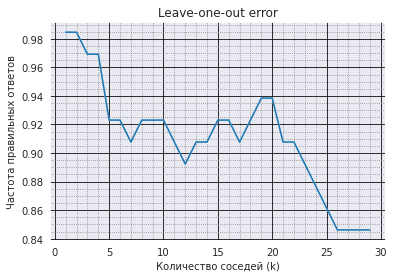

In [ ]:
print('K\t', 'Обучение\t\t', 'Контроль');

models = []
train_accuracy = []
test_accuracy = []
max_k =30
for n_neighbors in range(1, max_k):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)
    print(n_neighbors, '\t', model.score(X_train, Y_train), end = '')
    a = str(model.score(X_train, Y_train))
    if len(a) < 15:
        print('\t\t', end = '')
    print('\t', model.score(X_test, Y_test))   
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test))
best_k = test_accuracy.index(max(test_accuracy)) + 1
print('Лучшее число соседей (k)   :', best_k)
print('Процент ошибок на обучении :', (1-train_accuracy[best_k - 1]) * 100, '%')
print('Процент ошибок на контроле :', (1-test_accuracy[best_k - 1]) * 100, '%')

  #график + стили
sns.lineplot(range(1,max_k),test_accuracy)
sns.set_palette("Paired",11)
ax=sns.lineplot(range(1,max_k),test_accuracy)
ax.set( title='Leave-one-out error', xlabel = 'Количество соседей (k)', ylabel='Частота правильных ответов')
#  Добавляем линии основной сетки:
ax.grid(which='major',
        color = 'k')
#  Включаем видимость вспомогательных делений:
ax.minorticks_on()
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
ax.grid(which='minor',
        color = 'Grey',
        linestyle = ':')




### Метод k-ближайших соседей (KNN) в цикле

---


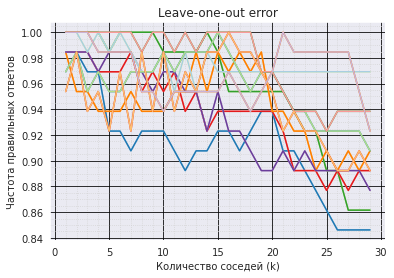

In [ ]:
for i in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  models = []
  train_accuracy = []
  test_accuracy = []
  max_k =30



  

  for n_neighbors in range(1, max_k):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)
    a = str(model.score(X_train, Y_train))
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test))

  #график + стили
  sns.set_palette("Paired",11)
  sns.lineplot(range(1,max_k),test_accuracy)
  ax=sns.lineplot(range(1,max_k),test_accuracy)
  ax.set( title='Leave-one-out error', xlabel = 'Количество соседей (k)', ylabel='Частота правильных ответов')
  ax.grid(which='major',
        color = 'k')
  ax.minorticks_on()
  ax.grid(which='minor',
        color = 'LightGrey',
        linestyle = ':')



# Метод окна Парзена (Parzen)

K	 Обучение		 Контроль
1 	 1.0			 0.9538461538461539
2 	 1.0			 1.0
3 	 1.0			 1.0
4 	 1.0			 1.0
5 	 1.0			 1.0
6 	 1.0			 1.0
7 	 1.0			 1.0
8 	 1.0			 1.0
9 	 1.0			 1.0
10 	 1.0			 1.0
11 	 1.0			 1.0
12 	 1.0			 1.0
13 	 1.0			 1.0
14 	 1.0			 1.0
15 	 1.0			 1.0
16 	 1.0			 1.0
17 	 1.0			 1.0
18 	 1.0			 1.0
19 	 1.0			 1.0
20 	 1.0			 1.0
21 	 1.0			 1.0
22 	 1.0			 1.0
23 	 1.0			 1.0
24 	 1.0			 0.9846153846153847
25 	 1.0			 0.9846153846153847
26 	 1.0			 0.9846153846153847
27 	 1.0			 0.9846153846153847
28 	 0.9932885906040269	 0.9846153846153847
29 	 0.9865771812080537	 0.9846153846153847
30 	 0.9865771812080537	 0.9846153846153847
31 	 0.9865771812080537	 0.9846153846153847
32 	 0.9865771812080537	 0.9846153846153847
33 	 0.9865771812080537	 0.9846153846153847
34 	 0.9865771812080537	 0.9846153846153847
35 	 0.9865771812080537	 0.9846153846153847
36 	 0.9865771812080537	 0.9846153846153847
37 	 0.9865771812080537	 0.9846153846153847
38 	 0.9865771812080537	 0.984615384615

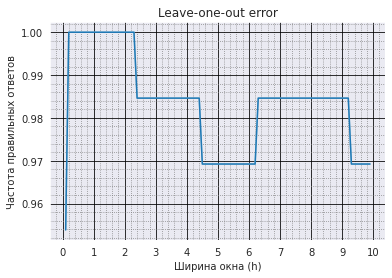

In [ ]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = []
        for yi in self.classes_:
          values = [y == yi][0]
          training_sets.append(X[np.array(values, dtype=bool)])

        #training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims = True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

print('K\t', 'Обучение\t\t', 'Контроль', end = '')
print()
train_accuracy = []
test_accuracy = []
max_h = 100
for i in range(1, max_h):
  model = KDEClassifier(bandwidth = i/10)
  model.fit(X_train, Y_train)
  models.append(model)
  train_accuracy.append(model.score(X_train, Y_train))
  print(i, '\t', model.score(X_train, Y_train), end = '')
  a = str(model.score(X_train, Y_train))
  if len(a) < 15:
      print('\t\t', end = '')
  test_accuracy.append(model.score(X_test, Y_test))
  print('\t', model.score(X_test, Y_test))    
best_h = test_accuracy.index(max(test_accuracy)) + 1
print('Лучшая ширина окна (h)     : ', best_h/10)
print('Процент ошибок на обучении : ', (1-train_accuracy[best_h - 1]) * 100, '%')
print('Процент ошибок на контроле : ', (1-test_accuracy[best_h - 1]) * 100, '%')

#график + стили
sns.lineplot(np.arange(1/10,max_h/10,0.1),test_accuracy)
sns.set_palette("Paired",11)

ax=sns.lineplot(np.arange(1/10,max_h/10,0.1),test_accuracy)
#specify x-axis locations
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#specify x-axis labels
x_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#add x-axis values to plot
ax.set_xticks (x_ticks)
ax.set_xticklabels(x_labels)
ax.set( title='Leave-one-out error', xlabel = 'Ширина окна (h)', ylabel='Частота правильных ответов')
#  Добавляем линии основной сетки:
ax.grid(which='major',
        color = 'k')
#  Включаем видимость вспомогательных делений:
ax.minorticks_on()
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
ax.grid(which='minor',
        color = 'Grey',
        linestyle = ':')



### Метод окна Парзена (Parzen) в цикле
---


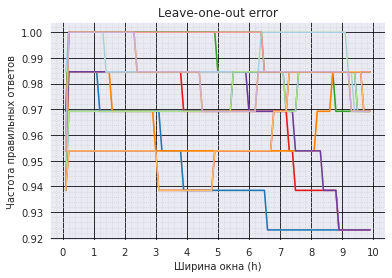

In [ ]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = []
        for yi in self.classes_:
          values = [y == yi][0]
          training_sets.append(X[np.array(values, dtype=bool)])

        #training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims = True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]
for i in range(10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  train_accuracy = []
  test_accuracy = []
  max_h = 100
  for i in range(1, max_h):
    model = KDEClassifier(bandwidth = i/10)
    model.fit(X_train, Y_train)
    models.append(model)
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test)) 

  sns.lineplot(np.arange(1/10,max_h/10,0.1),test_accuracy)

  sns.set_palette("Paired",11)
  ax=sns.lineplot(np.arange(1/10,max_h/10,0.1),test_accuracy)
  x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  x_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  ax.set_xticks (x_ticks)
  ax.set_xticklabels(x_labels)
  ax.set( title='Leave-one-out error', xlabel = 'Ширина окна (h)', ylabel='Частота правильных ответов')
  ax.grid(which='major',
        color = 'k')

  ax.minorticks_on()
  ax.grid(which='minor',
        color = 'LightGrey',
        linestyle = ':')


---


##Заключение

###1. Выборка данных (датасет)

* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Glass+Identification
* Описание выборки: по составу стекла определить его тип
* Количество классов: 7
* Количество признаков: 9
* Количество объектов: 206

###2. Метод ближайшего соседа (1NN)

Описание эксперимента: алгоритм присваивает классифицируемому объекту метку класса ближайшего объекта.

Результаты эксперимента:
* Процент ошибок на обучении: 0.0%
* Процент ошибок на контроле: 1.6%

###3. Метод k ближайших соседей (KNN)

Описание эксперимента:  алгоритм ищет наиболее оптимальное количество соседей k (учитывая как точность, так и обобщающую способность модели) на обучающей выборке, затем на контрольной выборке относит классифицируемый объект к классу k ближайших соседей.

Результаты эксперимента:
* Лучшее количество соседей: 1
* Процент ошибок на обучении: 0.0%
* Процент ошибок на контроле: 1.5%

###4. Метод окна Парзена (Parzen)

Описание эксперимента: алгоритм ищет лучшую ширину окна h (дальше которой объекты рассматриваться не будут) на обучающей выборке, затем на контрольной выборке относит классифицируемый объект к тому классу, у которого максимальна сумма весов соседей, входящих в h (весовая функция определяется как функция от расстояния между классифицируемым объектом и его соседями).

Результаты эксперимента: в зависимости от разбиения точность варьируется в диопозоне 0.92-1.0
* Лучшая ширина окна: 0.2 (для большинества разбиений)
* Процент ошибок на обучении: 0.0%
* Процент ошибок на контроле: 0.0%

###5. Вывод

Лучший результат продемонстрировал метод Парзена при ширине окна 0.2 (0.0% ошибок как на обузающей, так и на контрольной выборке)